# A Gentle Guide to Kaggle, Python and Related Packages 

Feb 5 2020 Data Mining Notes

# Kaggle

* We will be doing a lot of practice using the [Kaggle](kaggle.com) platform. Please register an account.

* The Kaggle page for our first competition is [here](https://www.kaggle.com/c/chapman-cs530-redwinequality/).
    - Download data in the [Data Tab](https://www.kaggle.com/c/chapman-cs530-redwinequality/data)
    - Guide for creating submissions [here](https://www.kaggle.com/chapmancs530/read-data-and-create-submissions)
    - [Submit](https://www.kaggle.com/c/chapman-cs530-redwinequality/submit) your solution by uploading the submission file
    - Check your scores at the [leaderboard](https://www.kaggle.com/c/chapman-cs530-redwinequality/leaderboard)

# Package Installation
* Highly recommend using [anaconda](https://www.anaconda.com/what-is-anaconda/?gclid=Cj0KCQiA7OnxBRCNARIsAIW53B9Rd3_6JK3qv5-wfNWhHcwvHmafebkmQgJ1fhnN5eY7hBapJhtnPrkaAkv0EALw_wcB) for environment management.
* Necessary packages for the course
    - Numpy
    - Pandas
    - Matplotlib
    - Scikit-learn
    - Statsmodels
    - Jupyter notebook
    - Keras
* Reccomended
    - seaborn
    - Jupyter lab

# NumPy/SciPy Introduction

NumPy is a widely-used numerical computation library for Python with high-performance utilities for working with multi-dimensional arrays. 

This notebook serves as a brief overview of Numpy and some of its features. It assumes python and basic scientific computing knowledge (MATLAB or R)



## Arrays and Accessing Elements

A NumPy array is a grid of numeric values, with entries indexed by non-negative integers. The number of directions in which an array can be indexed is called the *rank* of an array.

In [12]:
import numpy as np
A = np.array([range(10)])
print(A.shape)
print(A)

(1, 10)
[[0 1 2 3 4 5 6 7 8 9]]


In [13]:
B = np.array([[1, 2, 3],[10, 20, 30]])
print(B.shape)
print(B)

(2, 3)
[[ 1  2  3]
 [10 20 30]]


NumPy arrays support range indexing in multiple dimensions. Notice that numpy is 0-indexed. The : operator is shorthand for a built in range function.

In [14]:
print(B[:1, :])  # First row.
print(B[0:1, :])  # First row.
# subtle differences when indices are used with the : operator

[[1 2 3]]
[[1 2 3]]


In [15]:
print(B[:, :2])  # First two columns.

[[ 1  2]
 [10 20]]


In [16]:
print(B[:1, :2])  # Two first entries in first row.

[[1 2]]


Indexing works similarly as for regular Python lists, in that omitting the initial index will start the range at 0, as we see above. Similarly for the ending index. You can also feed a list to pick out specific columns:

In [17]:
idx = [0, 2]
print(B[:, idx])

[[ 1  3]
 [10 30]]


Unlike MATLAB, numpy defaults to element-wise operations

In [18]:
A / 2

array([[0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]])

Also, it is possible to "reshape" an array:

In [19]:
A = A.reshape((2, 5))
print (A.shape)

(2, 5)


Actually, there is a subtle point of confusion here. Observe the shape of the following:

In [20]:
row = A[1, :]
print (row)
print (row.shape)

[5 6 7 8 9]
(5,)


In [21]:
sub = A[1:2, :]
print (sub)
print (sub.shape)

[[5 6 7 8 9]]
(1, 5)


As you can see from above, accessing a row with just one index gives a *rank 1 view* of that row, while accessing it with a range gives a *rank 2 view* of the same elements. It's a bit subtle, but doing the former allows for using only one index to access a vector's elements:

In [22]:
print (row[0:3])

[5 6 7]


In [23]:
print (sub[0:3]) # Selects first three rows (but there is only one).
print (sub[0, 0:3]) # Selects first three elements of first row.

[[5 6 7 8 9]]
[5 6 7]


You can of course access single elements also.

In [24]:
print(A[1, 3])

8


## Creating Arrays

We already saw above that arrays can be created from lists, but NumPy also provides many useful utilities for creating arrays from scratch. Here are a few we wish to highlight.

In [25]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [26]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [58]:
# Random numbers between 0 and 1: see documentation for arguments for each function
np.random.random((2, 2))
# np.random.random([2, 2])

array([[0.0516309 , 0.99284426],
       [0.11347127, 0.27300253]])

In [28]:
# Multiply to get the number to range
# from 0 to the number you multiply with:
np.random.random((2, 2)) * 1000

array([[896.34804529, 365.22254363],
       [312.05738339, 146.25835863]])

In [29]:
# Just like Python's range, but creating arrays:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
# Evenly spaced numbers from 0 to 9, in 7 steps.
# Useful for parameter tuning
np.linspace(0, 9, num=7)

array([0. , 1.5, 3. , 4.5, 6. , 7.5, 9. ])

In [31]:
# Evenly spaced numbers from base^1 to base^10 in 10 steps:
# Useful for parameter tuning
np.logspace(1, 5, num=10, base=10)

array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])

In [32]:
# If you want to create an array of a very specific type:
X = np.array([[1, 2, 3], [10, 20, 30]], dtype=np.float64)

In [33]:
X.dtype

dtype('float64')

## Array Operations

You can perform operations on whole arrays, which allows for some powerful expressions in just a line or two of code *with no for loops*.

In [34]:
X = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.float64)
X

array([[1., 2., 3.],
       [4., 5., 6.]])

In [35]:
# Multiply every element of X by 10 and save the results in Y.
Y = X * 10
Y

array([[10., 20., 30.],
       [40., 50., 60.]])

In [36]:
# Element-wise multiplication:
X * Y

array([[ 10.,  40.,  90.],
       [160., 250., 360.]])

In [37]:
# Element-wise square roots:
np.sqrt(X)

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [38]:
# Create a vector:
v = np.array([1000, 2000, 3000])

In [39]:
v.shape

(3,)

In [40]:
# Matrix-vector multiplication:
X.dot(v)

array([14000., 32000.])

Can also just call the dot method. .T here transposes 
X to be a 3x3 matrix, and Z is a 2x2 matrix so the result
of multiplying them is a 3x2 matrix. In other words, 
X.T and Z are *compatible*.

In [41]:
Z = np.arange(1, 5).reshape((2, 2))
np.dot(X.T,Z)

array([[13., 18.],
       [17., 24.],
       [21., 30.]])

In [42]:
# If you need to see the transpose:
X.T

array([[1., 4.],
       [2., 5.],
       [3., 6.]])

### Boolean Indexing

You can use arrays of booleans to access elements of other arrays. It allows for selection of elements based on conditions!

In [43]:
X

array([[1., 2., 3.],
       [4., 5., 6.]])

In [44]:
# Elements larger than 4?
X > 4

array([[False, False, False],
       [False,  True,  True]])

In [45]:
# Access those elements:
X[X > 4]

array([5., 6.])

In [46]:
# Even elements?
bool_idx = X % 2 == 0
bool_idx

array([[False,  True, False],
       [ True, False,  True]])

In [47]:
X[bool_idx]

array([2., 4., 6.])

### Broadcasting

You can also apply operations on arrays that are not compatible, because NumPy will fill in missing values when it knows how to do so. For example, suppose that we wished to multiply every row of the array X above
by [1,2,3] element-wise. One solution would be to stack [1,2,3] to match the shape of X, and then multiply the two. So:

In [48]:
X

array([[1., 2., 3.],
       [4., 5., 6.]])

In [49]:
v = np.array([1, 2, 3])
v

array([1, 2, 3])

In [50]:
w = np.vstack([v,v]) # Can also use np.tile()
w

array([[1, 2, 3],
       [1, 2, 3]])

In [51]:
X * w

array([[ 1.,  4.,  9.],
       [ 4., 10., 18.]])

### Row-Wise and Column-Wise Operations

NumPy supports doing operations on each column or row of a rank 2 array.

In [52]:
X = np.arange(1, 13).reshape((3, 4))
X

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [53]:
X.sum()

78

In [54]:
# Sum along vertical axis:
X.sum(axis=1) # or np.sum(X, axis=1)

array([10, 26, 42])

In [55]:
# Sum along horizontal axis:
X.sum(axis=0)

array([15, 18, 21, 24])

In [56]:
# You can also define your own function to apply:
def ssmin(v):
    """Sum of squares of elements of v minus the minimum."""
    return np.sum(v**2) - min(v)
np.apply_along_axis(ssmin, 0, X)

array([106, 138, 176, 220])

# SciPy

SciPy provides many useful operations for operating on NumPy arrays for scientific, computer science, and engineering purposes. 

We won't be using scipy directly for the most part, but here are some examples of what it can do. 

In [57]:
from scipy import linalg
A = np.arange(1,5).reshape([2,2])
A

array([[1, 2],
       [3, 4]])

In [58]:
# Find eigenvalues of A:
linalg.eigvals(A)

array([-0.37228132+0.j,  5.37228132+0.j])

In [59]:
# Solve a linear system A x = b, for some vector b:
linalg.solve(A, np.array([2, 3]))

array([-1. ,  1.5])

# Matplotlib
Matplotlib is a useful library for plot functions. In notebooks, the command %matplotlib inline allows for plotting in cells.

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

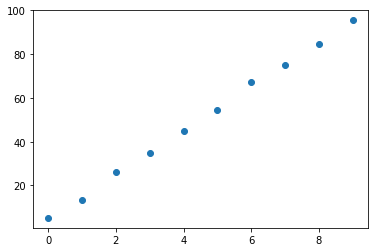

In [61]:
# plotting tutorial
n_points = 10
b0 = 5  # y intercept
b1 = 10  # slope
x = np.arange(n_points)  # predictors
noise = np.random.randn(n_points)
y = b0 + b1 * x + noise

plt.plot(x, y, 'o')

Matplotlib has many other sophisticated plotting functions and options that will be used as needed.

# Pandas

Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.



In [62]:
import pandas as pd

In [63]:
# Create a dataframe using a dictionary
dummy = {'hello': np.random.rand(10), 
         'world': np.random.rand(10), 
         'CS': np.random.rand(10), 
         '530': np.random.rand(10),
         'is_important': np.floor(np.random.rand(10)*2)}
df = pd.DataFrame(dummy)

In [67]:
df

,hello,world,CS,530,is_important
0,0.333272,0.068149,0.872712,0.492085,0.0
1,0.565575,0.043035,0.370687,0.600268,1.0
2,0.160601,0.428672,0.102503,0.234277,0.0
3,0.342494,0.337888,0.424079,0.599825,0.0
4,0.373096,0.573792,0.218031,0.436445,1.0
5,0.805959,0.274240,0.587285,0.297977,0.0
6,0.734981,0.212687,0.328167,0.532175,0.0
7,0.255884,0.452186,0.407955,0.850590,0.0
8,0.776016,0.327739,0.441753,0.176870,0.0
9,0.984807,0.499595,0.518591,0.734295,1.0


In [64]:
train = pd.read_csv('train.csv') # Read in files into a dataframe
train.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,12.0,0.370,0.76,4.2,0.066,7.0,38.0,1.00040,3.22,0.60,13.0,7
1,1,7.1,0.690,0.08,2.1,0.063,42.0,52.0,0.99608,3.42,0.60,10.2,6
2,2,9.6,0.500,0.36,2.8,0.116,26.0,55.0,0.99722,3.18,0.68,10.9,5
3,3,7.7,0.960,0.20,2.0,0.047,15.0,60.0,0.99550,3.36,0.44,10.9,5
4,4,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5


In [65]:
# Basic indexing with rows and columns
selected = train.loc[[0, 3, 4], ['fixed acidity', 'chlorides', 'quality']]
selected

,fixed acidity,chlorides,quality
0,12.0,0.066,7
3,7.7,0.047,5
4,15.5,0.095,5


In [69]:
# You can change the values in the dataframe 
selected.loc[3, ['fixed acidity']] = 100
selected

,fixed acidity,chlorides,quality
0,12.0,0.066,7
3,100.0,0.047,5
4,15.5,0.095,5


In [74]:
selected.loc[:, ['quality']] = 100
selected

,fixed acidity,chlorides,quality
0,12.0,0.066,100
3,100.0,0.047,100
4,15.5,0.095,100


In [75]:
# If you don't like indexes, you can use True and False as well
selected_indexes = [True, False, True]
selected.loc[selected_indexes, ['quality']] = 10
selected

,fixed acidity,chlorides,quality
0,12.0,0.066,10
3,100.0,0.047,100
4,15.5,0.095,10
